In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")

In [19]:
data = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/horse-colic/horse.csv')
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [20]:
print("Shape of data (samples, features): ", data.shape)

Shape of data (samples, features):  (299, 28)


In [21]:
data.dtypes.value_counts()

object     17
float64     7
int64       4
dtype: int64

([<matplotlib.axis.XTick at 0x7fcb71c37050>,
 [Text(0, 0, 'surgery'),
  Text(0, 0, 'age'),
  Text(0, 0, 'hospital_number'),
  Text(0, 0, 'rectal_temp'),
  Text(0, 0, 'pulse'),
  Text(0, 0, 'respiratory_rate'),
  Text(0, 0, 'temp_of_extremities'),
  Text(0, 0, 'peripheral_pulse'),
  Text(0, 0, 'mucous_membrane'),
  Text(0, 0, 'capillary_refill_time'),
  Text(0, 0, 'pain'),
  Text(0, 0, 'peristalsis'),
  Text(0, 0, 'abdominal_distention'),
  Text(0, 0, 'nasogastric_tube'),
  Text(0, 0, 'nasogastric_reflux'),
  Text(0, 0, 'nasogastric_reflux_ph'),
  Text(0, 0, 'rectal_exam_feces'),
  Text(0, 0, 'abdomen'),
  Text(0, 0, 'packed_cell_volume'),
  Text(0, 0, 'total_protein'),
  Text(0, 0, 'abdomo_appearance'),
  Text(0, 0, 'abdomo_protein'),
  Text(0, 0, 'outcome'),
  Text(0, 0, 'surgical_lesion'),
  Text(0, 0, 'lesion_1'),
  Text(0, 0, 'lesion_2'),
  Text(0, 0, 'lesion_3'),
  Text(0, 0, 'cp_data')])

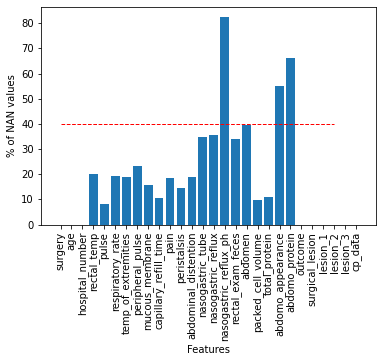

In [22]:
nan_per=data.isna().sum()/len(data)*100
plt.bar(range(len(nan_per)),nan_per)
plt.xlabel('Features')
plt.ylabel('% of NAN values')
plt.plot([0, 25], [40,40], 'r--', lw=1)
plt.xticks(list(range(len(data.columns))),list(data.columns.values),rotation='vertical')

In [23]:
obj_columns=[]
nonobj_columns=[]
for col in data.columns.values:
    if data[col].dtype=='object':
        obj_columns.append(col)
    else:
        nonobj_columns.append(col)
print(len(obj_columns)," Object Columns are \n",obj_columns,'\n')
print(len(nonobj_columns),"Non-object columns are \n",nonobj_columns)

data_obj=data[obj_columns]
data_nonobj=data[nonobj_columns]

17  Object Columns are 
 ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome', 'surgical_lesion', 'cp_data'] 

11 Non-object columns are 
 ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


In [24]:
print("Data Size Before Numerical NAN Column(>40%) Removal :",data_nonobj.shape)
for col in data_nonobj.columns.values:
    if (pd.isna(data_nonobj[col]).sum())>0:
        if pd.isna(data_nonobj[col]).sum() > (40/100*len(data_nonobj)):
            print(col,"removed")
            data_nonobj=data_nonobj.drop([col], axis=1)
        else:
            data_nonobj[col]=data_nonobj[col].fillna(data_nonobj[col].median())
print("Data Size After Numerical NAN Column(>40%) Removal :",data_nonobj.shape)

Data Size Before Numerical NAN Column(>40%) Removal : (299, 11)
nasogastric_reflux_ph removed
abdomo_protein removed
Data Size After Numerical NAN Column(>40%) Removal : (299, 9)


In [25]:
print("Data Size Before Categorical NAN Column(>40%) Removal :",data_obj.shape)
for col in data_obj.columns.values:
    if (pd.isna(data_obj[col]).sum())>0:
        if pd.isna(data_obj[col]).sum() > (40/100*len(data_nonobj)):
            print(col,"removed")
            data_obj=data_obj.drop([col], axis=1)
        else:
            data_obj[col]=data_obj[col].fillna(data_obj[col].mode()[0])
print("Data Size After Categorical NAN Column(>40%) Removal :",data_obj.shape)

Data Size Before Categorical NAN Column(>40%) Removal : (299, 17)
abdomo_appearance removed
Data Size After Categorical NAN Column(>40%) Removal : (299, 16)


In [26]:
for col in data_obj.columns.values:
    data_obj[col]=data_obj[col].astype('category').cat.codes
data_merge=pd.concat([data_nonobj,data_obj],axis=1)

target=data['outcome']
print(target.value_counts())
target=data_merge['outcome']
print(target.value_counts())

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64
2    178
0     77
1     44
Name: outcome, dtype: int64


Correlation of mentioned features wrt outcome in ascending order
outcome                  1.000000
packed_cell_volume       0.398371
pulse                    0.335550
surgical_lesion          0.332933
temp_of_extremities      0.290367
total_protein            0.265889
capillary_refill_time    0.256294
abdomen                  0.214875
rectal_exam_feces        0.193004
surgery                  0.189222
nasogastric_reflux       0.181422
peristalsis              0.165844
peripheral_pulse         0.165719
pain                     0.161964
abdominal_distention     0.112309
hospital_number          0.106396
age                      0.101782
lesion_1                 0.100738
lesion_2                 0.098993
cp_data                  0.078066
respiratory_rate         0.068581
mucous_membrane          0.056852
nasogastric_tube         0.049156
lesion_3                 0.044631
rectal_temp              0.013273
Name: outcome, dtype: float64


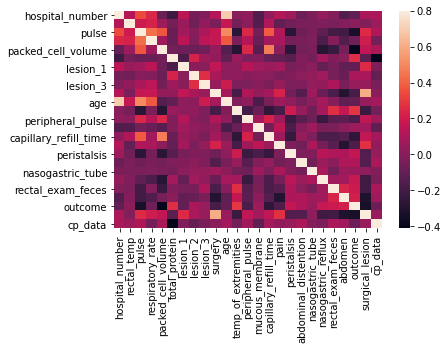

In [27]:
train_corr=data_merge.corr()
sns.heatmap(train_corr, vmax=0.8)
corr_values=train_corr['outcome'].sort_values(ascending=False)
corr_values=abs(corr_values).sort_values(ascending=False)
print("Correlation of mentioned features wrt outcome in ascending order")
print(abs(corr_values).sort_values(ascending=False))

In [28]:
print("Data Size Before Correlated Column Removal :",data_merge.shape)

for col in range(len(corr_values)):
        if abs(corr_values[col]) < 0.1:
            data_merge=data_merge.drop([corr_values.index[col]], axis=1)
            print(corr_values.index[col],"removed")
print("Data Size After Correlated Column Removal :",data_merge.shape)

Data Size Before Correlated Column Removal : (299, 25)
lesion_2 removed
cp_data removed
respiratory_rate removed
mucous_membrane removed
nasogastric_tube removed
lesion_3 removed
rectal_temp removed
Data Size After Correlated Column Removal : (299, 18)


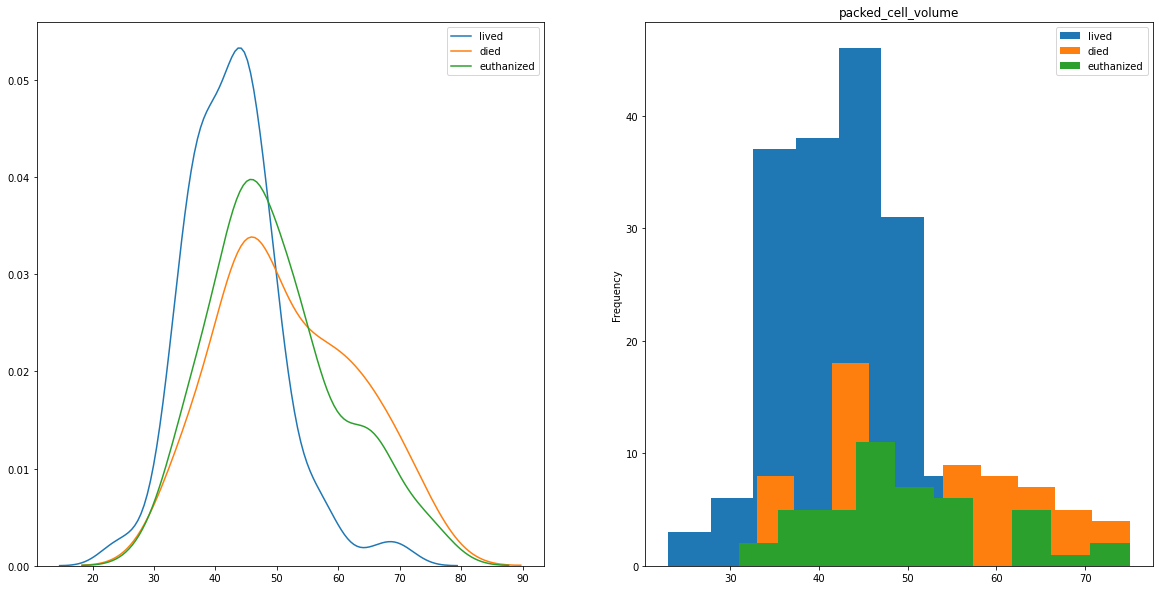

In [29]:
#packed_cell_volume 
col='packed_cell_volume'
fig,(ax1,ax2)=plt.subplots(1,2, figsize=[20,10])

y=data_merge[col][target==2]
x=data_merge['outcome'][target==2]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)

y=data_merge[col][target==0]
x=data_merge['outcome'][target==0]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)

y=data_merge[col][target==1]
x=data_merge['outcome'][target==1]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)

plt.title(col)
ax1.legend(['lived','died','euthanized'])
ax2.legend(['lived','died','euthanized'])
plt.show()

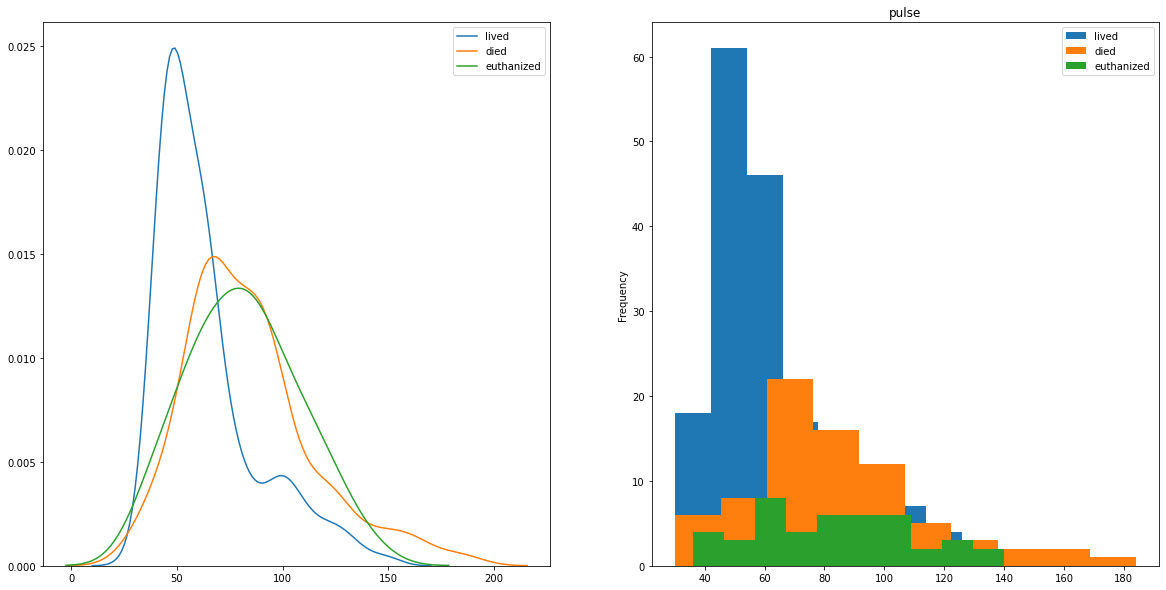

In [30]:
#pulse 
col='pulse'
fig,(ax1,ax2)=plt.subplots(1,2, figsize=[20,10])
y=data_merge[col][target==2]
x=data_merge['outcome'][target==2]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)
y=data_merge[col][target==0]
x=data_merge['outcome'][target==0]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)
y=data_merge[col][target==1]
x=data_merge['outcome'][target==1]
y.plot.hist(ax=ax2)
sns.kdeplot(y,ax=ax1)
plt.title(col)
ax1.legend(['lived','died','euthanized'])
ax2.legend(['lived','died','euthanized'])
plt.show()